# Compare the cycling networks of two European cities: Berlin 🇩🇪 and Paris 🇫🇷

Author: Frédéric DITH  |  Creation date: 2023-10-31  |  Last updated: 2023-11-01

## Context

This data exploration self-assignment was born out of a personal interest for the topic. I've lived in both cities (7 years in Paris, 10 years in Berlin), which allowed me to develop very subjective impressions and observations regarding the quality of their respective cycling networks. I wanted to explore this topic through data, in order to gain a different perspective on it. I also hope this project can display some of the skills I've gained during my learning journey, such as:
- Finding and retrieving data from various sources
- Data manipulation and transformation
- Analysis of the newly assembled dataset

## Questions to answer
- Which of these two cities has the longest cycling network?
- Which of these two cities has the longest cycling network, relative to their size?
- In each of these cities, which districts have the longest cycling network, relative to their size? 

## Summary of findings

- Berlin's cycling network is approximately 4 times longer than Paris' cycling network (1,766.5km for Berlin, 459.38km for Paris)
- However, Berlin and Paris are very different in terms of size (Berlin is approximately 8 times larger than Paris in terms of surface area, and its entire road network is approximately 4 times longer).
- **'Cycle to road' ratio** is a simple calculation that allows us to compare the cycling networks of cities or districts that have very different sizes:
    - Berlin has a total of 6635.75km of roads, and 1764.77km of cycling roads. Its 'cycle to road' ratio is **26.59%**
    - Paris has a total of 1565.65km of roads, and 459.38km of cycling roads. Its 'cycle to road'ratio is **29.34%**
    - Friedrichshain-Kreuzberg has a total of 209.89km of roads, and 90.13km of cycling roads. Its 'cycle to road' ratio is **42.94%**
    - Paris' 3rd arrondissement has a total of 26.15km of roads, and 2.79km of cycling roads. Its 'cycle to road' ratio is **10.69%**
- **At a district level**
    - Berlin: the three _Bezirke_ with the highest 'cycle to road' ratio are Friedrichshain-Kreuzberg, Mitte and Spandau
    - Paris: the three _arrondissements_ with the highest 'cycle to road' ratio are the 4th, the 19th and the 10th
- **Data recency**: Paris' cycling network dataset is constantly updated, while the Berlin's dataset was last updated in september 2018. Both cities have seen a lot of progress and development over the past years, and obtaining a more up-to-date dataset for Berlin would allow for a better comparison. 



## Methodology
- **1 - Data collection and transformation**: for each city, find the best possible data in order to compare the size of their cycling networks. I chose to collect the length of all the roads of the city, the length of all the cycling roads in each city, and the surface areas. All this data should be available at a district level (_Bezirke_ for Berlin, and _arrondissements_ for Paris), in order to allow for a more granular comparison.
- **2 - Exploration and analysis**: the newly assembled dataset should allow us to compare the two cities at a high level, as well as a district level


## Potential next steps
We've used the administrative districts of each city for this project, but given the large difference in size, it would be interesting to run the same analysis on areas of similar sizes. Two possibilities could be to compare:
- [Berlin's Ringbahn area](https://de.wikipedia.org/wiki/Berliner_Ringbahn) (approx. 8,800Ha surface area) to [Paris' Peripherique area](https://en.wikipedia.org/wiki/Boulevard_P%C3%A9riph%C3%A9rique) (approx. 8,700Ha surface area). This analysis would then be focused on the "urban core" of each city, which is likely to be more dense, in terms of cycling infrastructures
- Berlin city (what we used) to Ile-de-France (Paris and the five neighboring regions). This project would basically "zoom out" and look at a much larger comparable area. We would need to pay attention to the fact that the new french area would include multiple large cities, in addition to Paris itself.
- Assuming that many other cities also provide data on their road networks, cycling networks, and surface areas, it would be fairly easy to add new cities to the study


## Sources

| dataset                           | url                                                                                                                                                  | last updated |
|-----------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|--------------|
| Berlin road network               | [Berlin Open Data - Strassenabschnitte](https://daten.odis-berlin.de/de/dataset/detailnetz_strassenabschnitte/)                                      | 2021-02-24   |
| Berlin cycling network            | [Berlin Open Data - Radverkehrsanlagen](https://daten.odis-berlin.de/archive/radverkehrsanlagen/)                                                    | 2018-09-10   |
| Berlin districts (Bezirke)        | [Berlin Open Data - Ortsteile](https://daten.odis-berlin.de/de/dataset/ortsteile/)                                                                   | 2020-07-16   |
| Paris road network                | [Paris Open Data - Dénominations des emprises des voies actuelles](https://opendata.paris.fr/explore/dataset/denominations-emprises-voies-actuelles) | 2023-10-26   |
| Paris cycling network             | [Paris Open Data - Réseau des itinéraires cyclables](https://opendata.paris.fr/explore/dataset/reseau-cyclable)                                      | 2023-10-30   |
| Paris districts (arrondissements) | [Paris Open Data - Arrondissements](https://opendata.paris.fr/explore/dataset/arrondissements)                                                       | 2016-03-04   |


In [933]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests

%pip install geopandas
import geopandas as gpd

Note: you may need to restart the kernel to use updated packages.


# 1 - Data collection and transformation
For each city, we will collect:
- a unique identifier: we will be using Berlin's _Bezirke_, and Paris' _arrondissements_ (district)
- the length of the road network for all districts (road_len)
- the length of the cycling network for all districts (cycle_len)
- the surface area of all districts (surface_area)

We need to make sure that the series are similar for both cities. Once we have the data for both cities, we will merge them into a single dataframe.

## 1a - Berlin

In [934]:
# Berlin road network (stored in berlin1)
berlin1 = pd.read_csv(r"https://tsb-opendata.s3.eu-central-1.amazonaws.com/detailnetz_strassenabschnitte/Detailnetz-Strassenabschnitte.csv")
berlin1 = berlin1[["bezirk","laenge"]]
berlin1.rename(columns={"bezirk": "district", "laenge": "road_len"}, inplace=True)
berlin1 = berlin1.groupby(["district"]).sum(numeric_only=True)
#berlin

# Berlin cycling network (stored in berlin2)
berlin2 = gpd.read_file("https://tsb-opendata.s3.eu-central-1.amazonaws.com/0_archive/radverkehrsanlagen/Radverkehrsanlagen.geojson.zip")
berlin2 = berlin2[["STOR_NAME", "LAENGE"]]
berlin2.rename(columns={"STOR_NAME": "district", "LAENGE": "cycle_len"}, inplace=True)
berlin2 = berlin2.groupby(['district']).sum(numeric_only=True)
#berlin2

# Berlin surface area (stored in berlin3)
berlin3 = pd.read_csv("https://tsb-opendata.s3.eu-central-1.amazonaws.com/ortsteile/lor_ortsteile.csv")
berlin3 = berlin3[['BEZIRK','FLAECHE_HA']]
berlin3.rename(columns={"BEZIRK": "district", "FLAECHE_HA": "surface_area"}, inplace=True)
berlin3 = berlin3.groupby("district").sum(numeric_only=True)
#berlin3

# combine into (berlin4)
berlin4 = berlin1
berlin4['cycle_len'] = berlin2['cycle_len']
berlin4['surface_area'] = berlin3['surface_area']
berlin4['city'] = 'BER' # add a column with the city (this will be useful later)
berlin4 = berlin4.reset_index() # necessary for the merge to work
print(berlin4)
#berlin4.dtypes

                      district       road_len  cycle_len  surface_area city
0   Charlottenburg-Wilmersdorf  560161.832412   169577.9     6445.2814  BER
1     Friedrichshain-Kreuzberg  209889.542100    90134.7     2025.1530  BER
2                  Lichtenberg  402288.191151   100257.0     5194.7199  BER
3          Marzahn-Hellersdorf  614454.638334   118019.1     6159.4046  BER
4                        Mitte  412318.647728   169677.4     3932.0146  BER
5                     Neukölln  431913.036812   104444.0     4477.0480  BER
6                       Pankow  795243.069698   161242.6    10271.7351  BER
7                Reinickendorf  616506.107514   140794.4     8896.8868  BER
8                      Spandau  525837.850256   165372.5     9154.2448  BER
9          Steglitz-Zehlendorf  755203.860300   194599.2    10214.7546  BER
10        Tempelhof-Schöneberg  491818.832277   148588.8     5290.8905  BER
11            Treptow-Köpenick  820117.597831   202059.2    16710.9838  BER


## 1b - Paris
Note: [Opendata Paris](https://opendata.paris.fr/pages/home/) has an API, that I initially wanted to use for this project. However, this API limits the number of results we can get for each query. Therefore, we will work with .csv files exported from this database. All .csv files are in a subfolder named data.

In [992]:
# Paris road network (stored in paris1)
paris1 = pd.read_csv("data/paris_voies.csv", sep=';')
paris1 = paris1[['Arrondissement', 'Longueur voie']]
paris1.rename(columns={"Arrondissement": "district", "Longueur voie": "road_len"}, inplace=True)
paris1.dropna(subset='road_len', inplace=True) #remove all the roads that do not have length
paris1['district'] = paris1['district'].str.extract('(\d+)') # extract the numerical value
paris1['district'] = paris1['district'].astype(float) # convert to float
paris1['road_len'] = paris1['road_len'].astype(float) # convert to float
paris1 = paris1.groupby(['district']).sum(numeric_only=True)
paris1 = paris1.sort_values(by='district')
#paris1

# Paris cycling network (stored in paris2)
paris2 = pd.read_csv("data/paris_reseau_cyclable.csv", sep=';')
paris2.rename(columns={"arrdt": "district", "cycling_length": "cycle_len"}, inplace=True)
paris2['district'] = paris2['district'].astype(float) # convert to float
paris2 = paris2.groupby(['district']).sum(numeric_only=True)
paris2 = paris2.sort_values(by='district')
#paris2

# Paris surface area (stored in paris3)
paris3 = pd.read_csv("data/paris_arrondissements.csv", sep=';')
paris3 = paris3[['Numéro d’arrondissement','Surface','Nom officiel de l’arrondissement']]
paris3.rename(columns={'Numéro d’arrondissement': 'district', 'Surface': 'surface_area', 'Nom officiel de l’arrondissement': 'off_name'}, inplace=True)
paris3['district'] = paris3['district'].astype(float) # convert to float
paris3['surface_area'] = paris3['surface_area']/10000 # convert sqm to hectares
paris3 = paris3.sort_values(by='district')
paris3 = paris3.set_index('district') #set district as index
#paris3

# combine into paris4
paris4 = paris1
paris4['cycle_len'] = paris2['cycle_len']
paris4['surface_area'] = paris3['surface_area']
paris4['city'] = 'PAR' # add a column with the city (this will be useful later)
paris4['off_name'] = paris3['off_name'] # official name

paris4 = paris4.reset_index() # necessary for the merge to work

# format district name
paris4['district'] = paris4['district'].astype(int)
paris4['district'] = paris4['district'] + 75000
paris4['off_name'] = paris4['off_name'] + ' (' + paris4['district'].astype(int).astype(str)+ ')'
paris4['district'] = paris4['off_name']
paris4 = paris4.drop(columns='off_name')

print(paris4)


                       district  road_len     cycle_len  surface_area city
0                Louvre (75001)   54573.0   8991.727269    182.461286  PAR
1                Bourse (75002)   21599.0   4436.766267     99.115374  PAR
2                Temple (75003)   26155.0   2796.538346    117.088283  PAR
3        Hôtel-de-Ville (75004)   26510.0  12529.050818    160.058563  PAR
4              Panthéon (75005)   45358.0   9058.956626    253.937462  PAR
5            Luxembourg (75006)   41563.0   7256.343731    215.309559  PAR
6        Palais-Bourbon (75007)   60425.0  13593.869119    409.005719  PAR
7                Élysée (75008)   72973.0  22415.126298    388.003640  PAR
8                 Opéra (75009)   44529.0   9115.805468    217.830327  PAR
9              Entrepôt (75010)   44191.0  19289.594770    289.173944  PAR
10           Popincourt (75011)   67666.0  17423.387853    366.544155  PAR
11              Reuilly (75012)  187701.0  72405.621208   1631.478264  PAR
12             Gobelins (

## 1c - Combine both cities into a single dataframe

In [993]:
merged = pd.concat([berlin4, paris4], ignore_index=True)
merged

,district,road_len,cycle_len,surface_area,city
0,Charlottenburg-Wilmersdorf,560161.832412,169577.900000,6445.281400,BER
1,Friedrichshain-Kreuzberg,209889.542100,90134.700000,2025.153000,BER
2,Lichtenberg,402288.191151,100257.000000,5194.719900,BER
3,Marzahn-Hellersdorf,614454.638334,118019.100000,6159.404600,BER
4,Mitte,412318.647728,169677.400000,3932.014600,BER
5,Neukölln,431913.036812,104444.000000,4477.048000,BER
6,Pankow,795243.069698,161242.600000,10271.735100,BER
7,Reinickendorf,616506.107514,140794.400000,8896.886800,BER
8,Spandau,525837.850256,165372.500000,9154.244800,BER
9,Steglitz-Zehlendorf,755203.860300,194599.200000,10214.754600,BER


# 2 - Exploration and analysis

## How much larger is Berlin, compared to Paris?
We can answer this question by using all the data we collected earlier, regarding road network, cycling network and surface area.

In [994]:
# cycling network
BER_cycle_total = round(float(merged[merged['city'] == 'BER']['cycle_len'].sum() / 1000),2) # convert m to km
PAR_cycle_total = round(float(merged[merged['city'] == 'PAR']['cycle_len'].sum() / 1000),2) # convert m to km
compare_cycle = round(float(BER_cycle_total / PAR_cycle_total),2)

# road network
BER_road_total = round(float(merged[merged['city'] == 'BER']['road_len'].sum() / 1000),2) # convert m to km
PAR_road_total = round(float(merged[merged['city'] == 'PAR']['road_len'].sum() / 1000),2) # convert m to km
compare_road = round(float(BER_road_total / PAR_road_total),2)

# surface area
BER_surface_total = round(float(merged[merged['city'] == 'BER']['surface_area'].sum()),2)
PAR_surface_total = round(float(merged[merged['city'] == 'PAR']['surface_area'].sum()),2)
compare_surface_area = round(float(BER_surface_total / PAR_surface_total),2)

print('Berlin cycling network is ' + str(compare_cycle) + 'x larger than Paris cycle network')
print('Berlin road network network is ' + str(compare_road) + 'x larger than Paris road network')
print('Berlin surface area is ' + str(compare_surface_area) + 'x larger than Paris surface area')

Berlin cycling network is 3.84x larger than Paris cycle network
Berlin road network network is 4.24x larger than Paris road network
Berlin surface area is 8.42x larger than Paris surface area


These are important numbers to keep in mind when trying to compare the two cities.

## Which city has the longest cycling network?

In [995]:
print('Berlin cycling network length: ' + str(BER_cycle_total) + 'km')
print('Paris cycling network length: ' + str(PAR_cycle_total) + 'km')

Berlin cycling network length: 1764.77km
Paris cycling network length: 459.38km


## Which city has the longest cycling network, relative to their size?
With the dataset we assembled, we have to different ways to answer this question
- **Calculate the ratio between the cycling network and the road network**: by doing so, we would obtain a ratio that expresses the proportion of cycling network to the road network. It might not be perfect, but should be a good enough approximation of what we're interested in.
- **Calculate the ratio between the cycling network and the surface area**. I'd rather not divide values of different units (length and area) so we will stick with the first one


In [996]:
# "cycle to road" ratio
BER_cycle_ratio = round(float((BER_cycle_total / BER_road_total) * 100),2)
PAR_cycle_ratio = round(float((PAR_cycle_total / PAR_road_total) * 100),2)

print('Berlin \'cycle to road\' ratio: ' + str(BER_cycle_ratio) + '%')
print('Paris \'cycle to road\' ratio: ' + str(PAR_cycle_ratio) + '%')

Berlin 'cycle to road' ratio: 26.59%
Paris 'cycle to road' ratio: 29.34%


I personally find this number interesting, as it makes abstraction of the raw size of each city, and only tells the size of the cycling network, in comparison to the length of its road network.

There are many other parameters that go into evaluating the quality of a cycling network, but on its own, this ratio can be used as one measure of the quantity of cycling infrastructure in a city, and useful to compare cities of different sizes.

## In each city, which districts are the most cycling-friendly?

We will be using our 'cycle to road' ratio as an approximation.

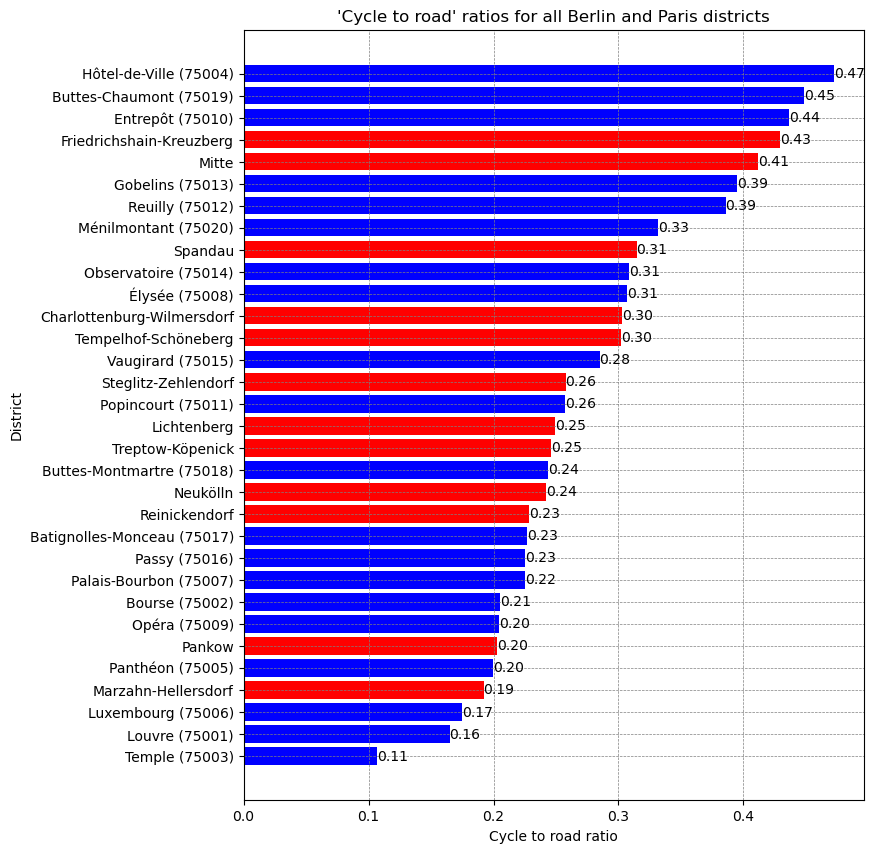

In [997]:
# add a ratio column to the merged df
merged['cycle_road_ratio'] = merged['cycle_len'] / merged['road_len']
merged = merged.sort_values('cycle_road_ratio', ascending=True)

# create bar chart
plt.figure(figsize=(8, 10))
color_mapping = lambda x: 'blue' if x == 'PAR' else 'red' # define colors, blue for Paris, red for Berlin
merged['color'] = merged['city'].apply(color_mapping)
x = merged['district'].astype(str)
y = merged['cycle_road_ratio']
chart = plt.barh(x, y, color=merged['color'], label=merged['city'])
plt.title('\'Cycle to road\' ratios for all Berlin and Paris districts')
plt.xlabel('Cycle to road ratio')
plt.ylabel('District')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

for bar, ratio in zip(chart, merged['cycle_road_ratio']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{ratio:.2f}', ha='left', va='center')

plt.show()


This chart shows the 'cycle to road' ratio for all districts in Berlin and Paris. While it is not the only measure that should be considered when trying to assess their cycling-friendliness, it can be used to compare different districts that have very different sizes. 